# Google Colab Setup
The following is to setup the notebook/


## Ensure no disconnections


In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

## Persistence setup
The following options are available for persistent data storage.

### 1. Google Drive via PyDrive

Import required PyDrive classes:

In [ ]:
!pip3 install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate and create the PyDrive client.

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
pydrive = GoogleDrive(gauth)

### 2. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Uni/3 Sem 2/MAST30034 Applied Data Science/Assignments/Assignment 2'

Mounted at /content/gdrive


In [ ]:
# with open(root_path + "/Data/test_file.txt", 'w') as f:
#   f.write("Hello Google Drive!")
# !cat "/content/gdrive/My Drive/Uni/3 Sem 2/MAST30034 Applied Data Science/Assignments/Assignment 2/test_file.txt"

cat: '/content/gdrive/My Drive/Uni/3 Sem 2/MAST30034 Applied Data Science/Assignments/Assignment 2/test_file.txt': No such file or directory


In [ ]:
# drive.flush_and_unmount()

### 3. Local upload


Run below block to upload files from local system:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f"""User uploaded file "{name}" with length {length} bytes.""", 
        name=fn, length=len(uploaded[fn]))

Run below block to download `FILENAME` to local system:

In [ ]:
FILENAME = ""
with open(FILENAME, 'w') as f:
  #f.write(...)

files.download(FILENAME)

## Couple extra niceties

In [ ]:
! pip3 install fastprogress
from fastprogress import master_bar, progress_bar

# Import libraries

Data representation libraries:

In [ ]:
%%time 
import numpy as np
from numpy import log

import pandas as pd
from pandas.api.types import CategoricalDtype, is_numeric_dtype

from datetime import datetime

!pip3 install geopandas
import geopandas as gpd

CPU times: user 112 ms, sys: 43.7 ms, total: 156 ms
Wall time: 5.04 s


Modelling libraries:

In [ ]:
from tempfile import mkdtemp
from sklearn.externals.joblib import Memory

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LassoLarsCV
from sklearn import tree, ensemble, feature_selection

from sklearn.model_selection import *

from sklearn.pipeline import Pipeline, make_pipeline

from statsmodels.formula.api import *

from scipy.stats import beta, uniform

/Users/danielye/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Visualisation libraries:

In [ ]:
!pip3 install seaborn==0.11.0
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

import folium

from branca.colormap import LinearColormap

Miscellaneous

In [ ]:
from itertools import product

# Constants

In [ ]:
ROOT_DIR = "/Users/danielye/Google Drive/Uni/3 Sem 2/MAST30034 Applied Data Science/Assignments/Assignment 2"
SEED = 30034
sns.set_style('darkgrid')

The following cell defines the categorical attribute values expected to be read.

In [ ]:
MONTH_CATEGORIES = CategoricalDtype(
    [
      'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ], 
    ordered=True
)

COMPANY_CATEGORIES = CategoricalDtype(
    [
      'Yellow', 
      'Green', 
      'Uber', 
      'Juno', 
      'Via', 
      'Lyft'
    ], 
    ordered=False
)

VENDOR_MAP = {
    1: 'Creative Mobile Technologies, LLC.',
    2: 'Verifone Inc.',
    4: 'Flywheel Inc.'
}
VENDOR_CATEGORIES = CategoricalDtype(VENDOR_MAP.values() , ordered=False)

RATECODES_MAP = {
    1: 'Standard', 
    2: 'JFK', 
    3: 'Newark', 
    4: 'Nassau/Westchester', 
    5: 'Negotiated', 
    6: 'Group', 
    99: 'Unknown'
}
RATECODE_CATEGORIES = CategoricalDtype(RATECODES_MAP.values(), ordered=False)

PAYMENT_MAP = {
    0: 'Unknown',
    1: 'Credit Card',
    2: 'Cash',
    3: 'No charge', 
    4: 'Dispute', 
    5: 'Unknown', 
    6: 'Voided Trip'
}
PAYMENT_CATEGORIES = CategoricalDtype(set(PAYMENT_MAP.values()), ordered=False)

LICENSE_COMPANY_MAP = {
    'HV0003': 'Uber',
    'HV0005': 'Lyft',
    'HV0002': 'Juno',
    'HV0004': 'Via'
}

LICENSES = {
    'yellow': 'Medallion',
    'green': 'Street Hail Liveries',
    'fhv': 'High-Volume For-Hire Services',
    'fhvhv': 'High-Volume For-Hire Services'
}
LICENSE_CATEGORIES = CategoricalDtype(set(LICENSES.values()))

LOCATION_CATEGORIES = CategoricalDtype(range(1, 257), ordered=False)

DAY_MAP = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

DAY_CATEGORIES = CategoricalDtype(DAY_MAP.values(), ordered=True)

hours = [12] + list(range(1, 12))
hours = [f'{hour}{am_pm}' for am_pm, hour in product(['am', 'pm'], hours)]
HOUR_MAP = dict(zip(range(0, 24), hours))
HOUR_CATEGORIES = CategoricalDtype(HOUR_MAP.values(), ordered=True)

# ETL Process

The following blocks will load the geographic taxi zone data, as well as the New York weather data. 

[Load TLC Data](https://colab.research.google.com/drive/1a4IMifvc7twzU96XSOIrjeuhlWL0oG5x?authuser=1#scrollTo=yKhcjIfEJihi) and [Clean TLC Data](https://colab.research.google.com/drive/1a4IMifvc7twzU96XSOIrjeuhlWL0oG5x?authuser=1#scrollTo=CC1Kuyjz2jCe&line=1&uniqifier=1) sections define functions that specify what will happen in each of the listed steps. It does not execute anything until these functions are called. The functions can be passed is a list into the `pipeline` argument of the [`get_tlc_data()`](https://colab.research.google.com/drive/1a4IMifvc7twzU96XSOIrjeuhlWL0oG5x?authuser=1#scrollTo=SYCa7BnW9q5k&line=10&uniqifier=1) function, at which point data will actually be loaded and the processes carried out.

## Load Zone Lookup

In [ ]:
zones_df = pd.read_csv(ROOT_DIR + '/Data/taxi+_zone_lookup.csv')
zones_df

LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                       NV          NaN
264         265        Unknown                      NaN          NaN

[265 rows x 4 columns]

## Load NYC Weather Data

In [ ]:
jfk_weather_df = pd.read_csv(ROOT_DIR + '/Data/jfk_weather_2019.csv')

jfk_weather_df = jfk_weather_df.rename(columns={
    'STATION': 'station',
    'DATE': 'date',
    'NAME': 'name',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'ELEVATION': 'elevation',
    'AWND': 'wind_speed_avg',
    'PGTM': 'peak_gust_time',
    'PRCP': 'precipitation',
    'SNOW': 'snowfall',
    'SNWD': 'snow_depth',
    'TAVG': 'temp_avg',
    'TMAX': 'temp_max',
    'TMIN': 'temp_min',
    'WDF2': 'wind_direction_2min_fastest',
    'WDF5': 'wind_direction_5min_fastest',
    'WSF2': 'wind_speed_2min_fastest',
    'WSF5': 'wind_speed_5min_fastest',
    'WT01': 'fog',
    'WT02': 'hvy_fog__hvy_freezing_fog',
    'WT03': 'thunder',
    'WT04': 'ice_pellet__sleet__snow__small_hail',
    'WT05': 'hail',
    'WT06': 'glaze__rime',
    'WT08': 'smoke__haze',
    'WT09': 'blow_snow__drift_snow'
})

# cast data into appropriate data types
jfk_weather_df.date = jfk_weather_df.date.astype('datetime64[D]')

bool_attributes = [
    'fog', 'hvy_fog__hvy_freezing_fog',
    'thunder', 'ice_pellet__sleet__snow__small_hail', 'hail', 'glaze__rime',
    'smoke__haze', 'blow_snow__drift_snow'
]
for attribute in progress_bar(bool_attributes):
  jfk_weather_df[attribute] = jfk_weather_df[attribute].fillna(False).astype('bool')

temp_attributes = ['temp_avg', 'temp_max', 'temp_min']
for attribute in progress_bar(temp_attributes):
  jfk_weather_df[attribute] = jfk_weather_df[attribute].astype('int8') 

# attribute selection
weather_attributes = [
    'date', 'wind_speed_avg', 'precipitation', 'snowfall',
    'snow_depth', 'temp_avg', 'temp_max', 'temp_min', 
    
    'fog', 'hvy_fog__hvy_freezing_fog',
    'thunder', 'ice_pellet__sleet__snow__small_hail', 'hail', 'glaze__rime',
    'smoke__haze', 'blow_snow__drift_snow'
]
jfk_weather_df = jfk_weather_df[weather_attributes]

## Load TLC Data

### Type-casting

In [ ]:
def cast_data(df):
  """Takes a Pandas dataframe `df`, normalizes attribute values and cast the 
  columns to the appropriate datatype. Returns the modified (in-place) 
  dataframe."""


  def cast_attribute(name, to_dtype, values=None, rename=None):  
    """
    Takes the name of an column `name` and the desired datatype to cast it to
    `to_dtype` in place. Optionally normalizes the values according to a 
    dictionary mapping `values`. Optionally renames the column name to `rename`.
    Returns reference to the modified dataframe.
    """
    nonlocal df 

    if name not in df.columns:
      return df

    if values and isinstance(to_dtype, CategoricalDtype):
      df[name] = df[name]\
      .astype('category')\
      .cat\
      .rename_categories(values)
    elif values:
      df[name] = df.replace(to_replace=values)
  
    df[name] = df[name].astype(to_dtype)

    if rename:
      df = df.rename(columns={name: rename})

    return df

  # Fix attributes for both
  df = cast_attribute(name='PULocationID', to_dtype=LOCATION_CATEGORIES)
  df = cast_attribute(name='DOLocationID', to_dtype=LOCATION_CATEGORIES)

  # Fix For-Hire High-Volume specific attributes
  df = cast_attribute(name='hvfhs_license_num', to_dtype=COMPANY_CATEGORIES,
      values=LICENSE_COMPANY_MAP, rename='company')
  df = cast_attribute(name='dispatching_base_num', to_dtype='category')
  df = cast_attribute(name='SR_Flag', to_dtype='bool', rename='shared')
  df = cast_attribute(name='pickup_datetime', to_dtype='datetime64[ns]')
  df = cast_attribute(name='dropoff_datetime', to_dtype='datetime64[ns]')

  # Fix Yellow/Green taxi specific attributes
  # -- New attributes
  if 'tpep_pickup_datetime' in df.columns: 
    df['company'] = 'Yellow' 
    df['license'] = 'Medallion'
  if 'lpep_pickup_datetime' in df.columns: 
    df['company'] = 'Green' 
    df['license'] = 'Street Hail Liveries'

  df = cast_attribute(name='company', to_dtype=COMPANY_CATEGORIES)
  df = cast_attribute(name='license', to_dtype=LICENSE_CATEGORIES)

  # -- Existing attributes
  df = cast_attribute(name='tpep_pickup_datetime', to_dtype='datetime64[ns]',
                      rename='pickup_datetime')
  df = cast_attribute(name='tpep_dropoff_datetime', to_dtype='datetime64[ns]',
                      rename='dropoff_datetime')
  df = cast_attribute(name='lpep_pickup_datetime', to_dtype='datetime64[ns]',
                      rename='pickup_datetime')
  df = cast_attribute(name='lpep_dropoff_datetime', to_dtype='datetime64[ns]',
                      rename='dropoff_datetime')
  df['trip_duration'] = df.dropoff_datetime - df.pickup_datetime
  
  df = cast_attribute(name='VendorID', to_dtype=VENDOR_CATEGORIES, 
                      values=VENDOR_MAP, rename='vendor')
  df = cast_attribute(name='RatecodeID', to_dtype=RATECODE_CATEGORIES, 
                      values=RATECODES_MAP, rename='meter_rate')
  df = cast_attribute(name='payment_type', to_dtype=PAYMENT_CATEGORIES,
                      values=PAYMENT_MAP)
  df = cast_attribute(name='store_and_fwd_flag', to_dtype='bool')
  df = cast_attribute(name='passenger_count', to_dtype='Int64')
  df = cast_attribute(name='trip_distance', to_dtype='float')
  df = cast_attribute(name='mta_tax', to_dtype='float')
  df = cast_attribute(name='fare_amount', to_dtype='float')
  df = cast_attribute(name='improvement_surcharge', to_dtype='float')
  
  return df


In [ ]:
class tlc_caster(BaseEstimator, TransformerMixin):
  def __init__(self):
    return
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return cast_data(X)

### Select Attributes

In [ ]:
def tlc_select_attributes(df):
  selected_attributes = [
    # NUMERICAL FEATURES
    'fare_amount', 
    'tip_amount', 
    # 'total_amount', 
    'passenger_count',
    'trip_distance',
    # TIMESERIES FEATURES
    'pickup_datetime', 
    'dropoff_datetime', 
    # CATEGORICAL FEATURES
    'PULocationID',
    'DOLocationID',
    # 'company',
    # 'meter_rate',
    'congestion_surcharge',
  ]
  df = df[selected_attributes]
  return df

In [ ]:
class tlc_selector(BaseEstimator, TransformerMixin):
  def __init__(self):
    return
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return tlc_select_attributes(X)

### New features

In [ ]:
def add_engineered_features(df):
  """
  Function adds the new features needed for analysis.
  """

  df['trip_duration'] = (df.dropoff_datetime - df.pickup_datetime)
  df['month'] = df.pickup_datetime.dt.
  df['day'] = df.pickup_datetime.dt.dayofweek.replace(DAY_MAP).astype(DAY_CATEGORIES)
  df['hour_pickup'] = df.pickup_datetime.dt.hour.replace(HOUR_MAP).astype(HOUR_CATEGORIES)
  df['date'] = df.pickup_datetime.dt.date.astype('datetime64[D]')
  df = df.drop(columns=['pickup_datetime', 'dropoff_datetime'])

  return df

In [ ]:
class tlc_engineer(BaseEstimator, TransformerMixin):
  def __init__(self):
    return
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return add_engineered_features(X)

### Clean TLC Data

In [ ]:
def clean_data(df): 
  """
  Remove or fix incorrect data according to the following rules:
  """

  if 'trip_duration' in df.columns:
    too_long = df[df.trip_duration > np.timedelta64(3, 'h')].index # Look at Google Maps
    negative_duration = df[df.trip_duration < np.timedelta64(0, 's')].index 
    drop_indices = too_long.union(negative_duration)
    df = df.drop(index=drop_indices)
    df.trip_duration = df.trip_duration.dt.seconds / 60

  if 'trip_distance' in df.columns:

    max_dist = 60.0 # also have a look at Google Maps 
    quantile_99999 = df.trip_distance.quantile(0.99999)

    too_far = df[df.trip_distance > min(max_dist, quantile_99999)].index
    negative_dist = df[df.trip_distance <= 0].index
    drop_indices = too_far.union(negative_dist)
    df = df.drop(index=drop_indices)

  if 'fare_amount' in df.columns:
    negative_fares = df[df.fare_amount <= 0].index # probably refunds or void trips
    too_high = df[df.fare_amount > 350].index # these are getting silly
    drop_indices = negative_fares.union(too_high)
    df = df.drop(index=drop_indices)

  if 'congestion_surcharge' in df.columns:
    df.congestion_surcharge = df.congestion_surcharge.fillna(0.0)

  return df

In [ ]:
class tlc_cleaner(BaseEstimator, TransformerMixin):
  def __init__(self):
    return
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return clean_data(X)

### Filter by location

In [ ]:
def get_midtown_jfk(df):
  """
  Gets only the relevant instances from the dataframe that represent trips from
  Midtown Manhattan to JFK airport and returns this as a new `pd.DataFrame`.
  """

  zones_df.Zone.fillna("", inplace=True)

  jfk_id = zones_df[zones_df.Zone.str.contains('JFK')].LocationID.values
  midtown_ids = zones_df[zones_df.Zone.str.contains('Midtown')].LocationID.values

  assert 'PULocationID' in df.columns
  assert 'DOLocationID' in df.columns

  df = df[
      df.PULocationID.isin(midtown_ids) & df.DOLocationID.isin(jfk_id)
  ]

  # DOLocation is no longer informative, drop it
  df = df.drop(columns='DOLocationID')

  return df

In [ ]:
class location_filter(BaseEstimator, TransformerMixin):

  def __init__(self, pu_ids=None, do_ids=None, pu_locs=None, do_locs=None):

    if not ((bool(pu_locs) ^ bool(pu_ids)) and (bool(do_locs) ^ bool(do_ids))):
      raise ValueError("""Must specify at least one of `pu_locs` or `pu_ids`, 
      and one of `do_locs` or `do_ids""")
    
    if pu_ids:
      self.pickup_ids = pu_ids if isinstance(pu_ids, list) else [pu_ids]
    else:
      pickup_ids = np.asarray([self.__get_location_ids__(loc) for loc in pu_locs] if isinstance(pu_locs, list) else self.__get_location_ids__(pu_locs))
      self.pickup_ids = pickup_ids.ravel().tolist()
    
    if do_ids:
      self.dropoff_ids = do_ids if isinstance(do_ids, list) else [do_ids]
    else:
      dropoff_ids = np.asarray([self.__get_location_ids__(loc) for loc in do_locs] if isinstance(do_locs, list) else self.__get_location_ids__(do_locs))
      self.dropoff_ids = dropoff_ids.ravel().tolist()
      
    self.pickup_locs = [self.__get_location_names__(id) for id in self.pickup_ids]
    self.dropoff_locs = [self.__get_location_names__(id) for id in self.dropoff_ids]
    

  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return self.__get_PU_DO_subset__(X)

  def __get_location_names__(self, loc_id):
    return zones_df[zones_df.LocationID == loc_id].Zone

  def __get_location_ids__(self, name_contains):
    zones_df.Zone.fillna("", inplace=True)
    return zones_df[zones_df.Zone.str.contains(name_contains)].LocationID.values
  def __get_PU_DO_subset__(self, df):

    assert 'PULocationID' in df.columns
    assert 'DOLocationID' in df.columns

    df = df[
        df.PULocationID.isin(self.pickup_ids) & df.DOLocationID.isin(self.dropoff_ids)
    ]

    # DOLocation is no longer informative, drop it
    df = df.drop(columns='DOLocationID')

    return df

### Combine with weather data

In [ ]:
class weather_linker(BaseEstimator, TransformerMixin):

  def __init__(self):
    return

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    return combine_weather(X)

def combine_weather(df):
  assert 'date' in df.columns
  return df.merge(
    right=jfk_weather_df,
    how='inner',
    on='date',
    copy=False,
  )

### TLC ETL pipeline

In [ ]:
def get_tlc(year, months, transform=None):

  """
  Implements a blocked methodology in attempt to import the data without 
  overrunning memory.
  """

  dfs = dict()
  
  for month_num in progress_bar(list(months)):
    
    month_str = f"{month_num:02}"
    local_path = f'/Data/yellow_{year}/yellow_tripdata_{year}-{month_str}.feather'
    file_path = ROOT_DIR + local_path
    month_df = pd.read_feather(file_path)
    
    if transform:
      month_df = transform.fit_transform(month_df)
  
    month_name = MONTH_CATEGORIES.categories[month_num - 1]
    dfs[month_name] = month_df

  grand_df = pd.concat(dfs.values(), axis=0, keys=dfs.keys(), ignore_index=True)

  return grand_df

# Exploration

## Plot distribution of selected attributes

Text(0.5, 0, 'Trip Duration (minutes)')

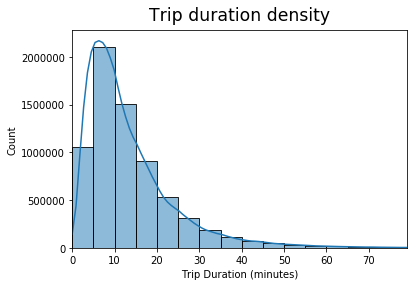

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=tlc_df.trip_duration.astype('timedelta64[m]'), 
    binwidth=5,
    stat='count',
    kde=True,
)
ax.set_xlim(left=0, right=tlc_df.trip_duration.astype('timedelta64[m]').quantile(0.999))
ax.set_title('Trip duration density', size='xx-large', pad=10,)
ax.set_xlabel('Trip Duration (minutes)')

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


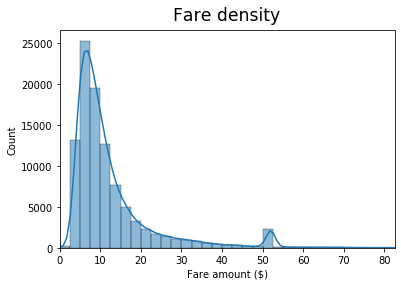

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=tlc_df.fare_amount,
    # bins='rice',
    binwidth=2.5,
    stat='count',
    kde=True,
    kde_kws={
        'bw_adjust': 1,
        'gridsize': 300,
        'cut': 0,
    }
)
ax.set_xlim(left=0, right=tlc_df.fare_amount.quantile(0.999))
ax.set_title('Fare density', size='xx-large', pad=10,)
ax.set_xlabel('Fare amount ($)')
fig.show()

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


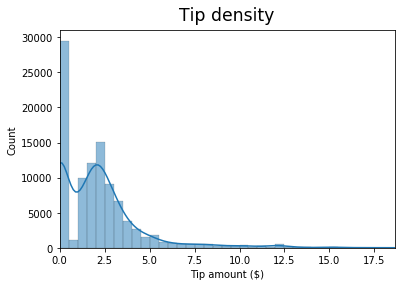

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=tlc_df.tip_amount,
    # bins='rice',
    binwidth=0.5,
    stat='count',
    kde=True,
    kde_kws={
        'bw_adjust': 2,
        'gridsize': 1000,
        'cut': 0,
    }
)
ax.set_xlim(left=0, right=tlc_df.tip_amount.quantile(0.999))
ax.set_title('Tip density', size='xx-large', pad=10,)
ax.set_xlabel('Tip amount ($)')
fig.show()

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


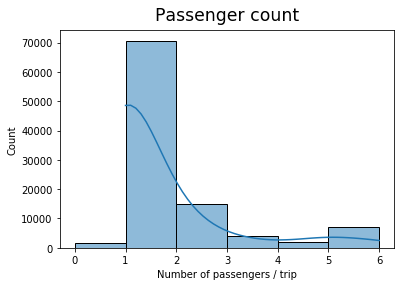

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=tlc_df.passenger_count,
    # bins='rice',
    binwidth=1,
    stat='count',
    kde=True,
    kde_kws={
        'bw_adjust': 5,
        'gridsize': 50,
        'clip': [1, 20],
    }
)
ax.set_title('Passenger count', size='xx-large', pad=10,)
ax.set_xlabel('Number of passengers / trip')
fig.show()

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


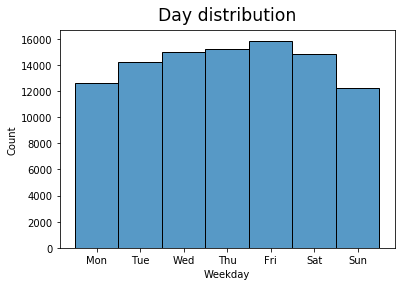

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=tlc_df.day,
    stat='count',
)
ax.set_title('Day distribution', size='xx-large', pad=10,)
ax.set_xlabel('Weekday')
fig.show()

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


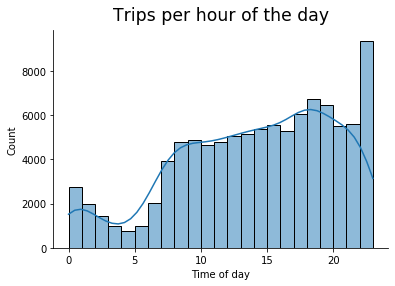

In [ ]:
fig, ax = plt.subplots()
sns.despine(fig)
ax = sns.histplot(
    x=tlc_df.pickup_datetime.dt.hour,
    # bins='rice',
    binwidth=1,
    stat='count',
    kde=True,
    kde_kws={
        'bw_adjust': 2,
        'gridsize': 50,
        'cut': 0
    },
)
ax.set_xticks(range(0, 24, 3))
ax.set_title('Trips per hour of the day', size='xx-large', pad=10,)
ax.set_xlabel('Time of day')
fig.show()

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


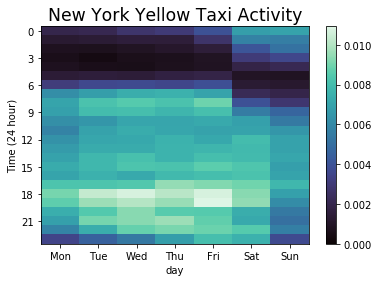

In [ ]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax = sns.histplot(
    data=tlc_df,
    x='day',
    y='hour',
    # hue='day',
    discrete=True,
    stat='probability',
    cbar=True,
    cmap=sns.color_palette('mako', as_cmap=True)
)
ax.set_title('New York Yellow Taxi Activity', size='xx-large')
ax.set_ylabel('Time (24 hour)')
ax.set_yticks(range(0, 24, 3))
fig.show()

## Scatter against trip duration

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


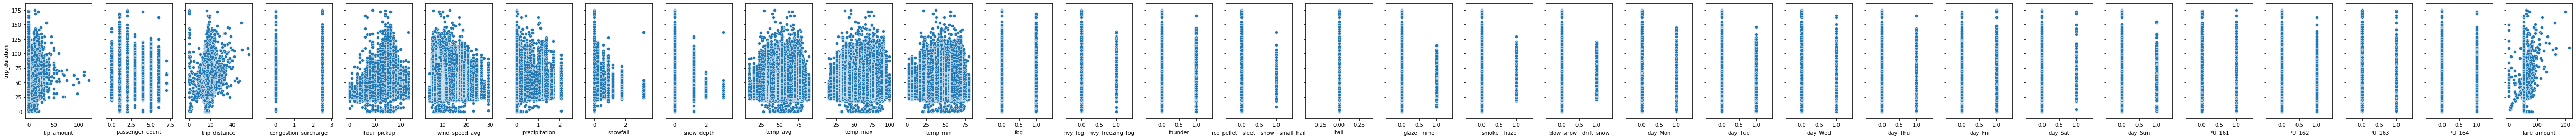

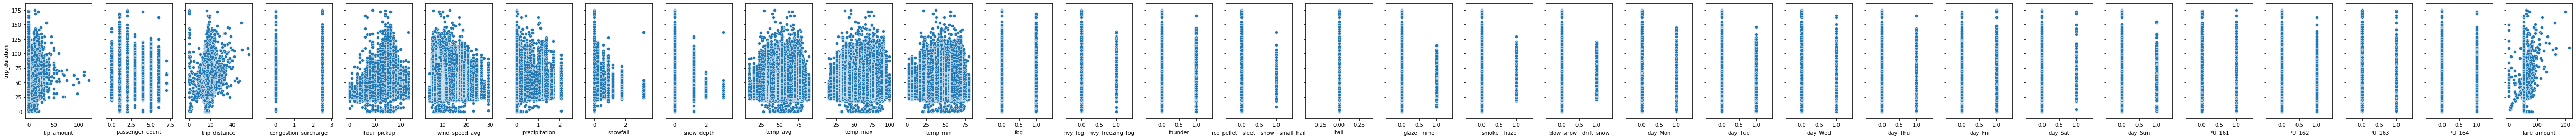

In [ ]:
attributes = tlc_df.columns.drop('trip_duration')
fig, axs = plt.subplots(
    ncols=attributes.size,
    sharey=True,
)
for i, attribute in progress_bar(list(enumerate(attributes))):
  
  ax = axs[i-1]

  sns.scatterplot(
      x=attribute,
      y='trip_duration',
      data=tlc_df,
      ax=ax
  )
  ax
fig.tight_layout()
fig.set_figwidth(attributes.size * 2.7)
fig

## Pairsplot

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

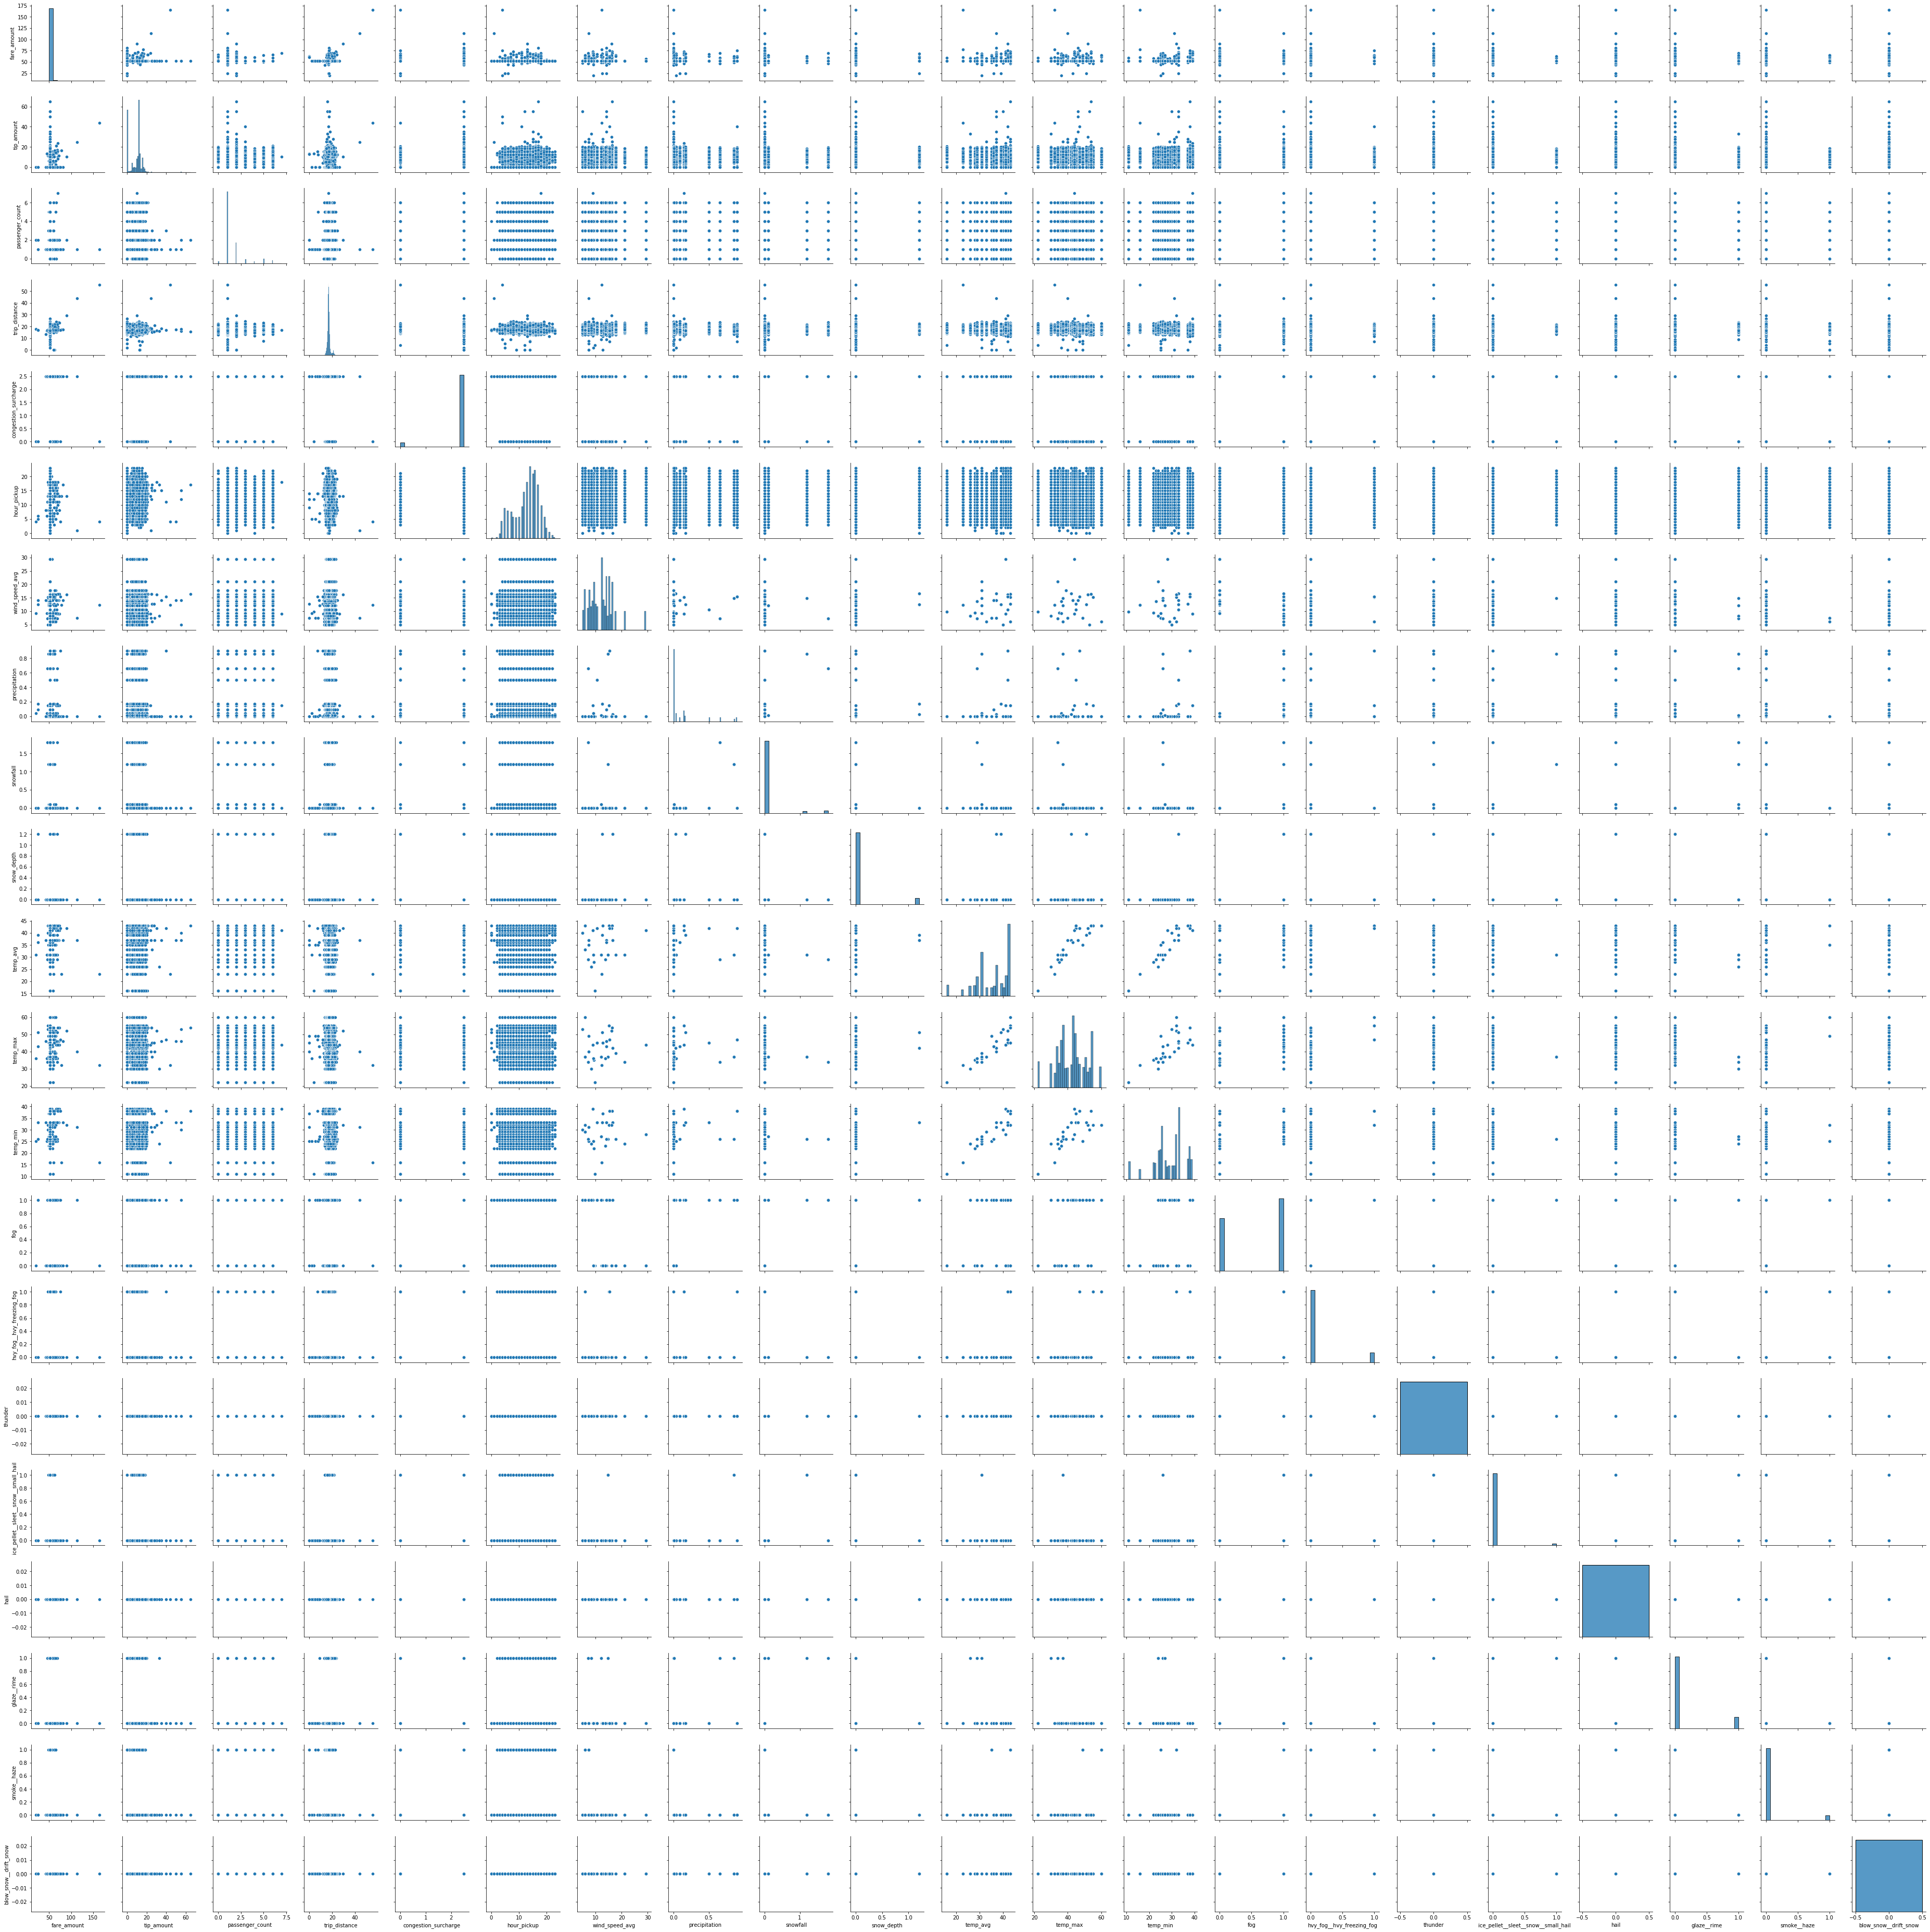

In [ ]:
sns.pairplot(midtown_jfk_weather_df)

# Research: Predict Midtown Manhattan to JFK Travel Time

## Get data

In [ ]:
midtown_jfk_pipe = Pipeline(
    steps=[
        ('casting', tlc_caster()),
        ('selection', tlc_selector()),
        ('add_time_features', tlc_engineer()),
        ('cleaning', tlc_cleaner()),
        ('get_jfk_midtown', location_filter(pu_locs='Midtown', do_locs='JFK')),
        ('combine_weather', weather_linker())
    ]
)
midtown_jfk_df = get_tlc(
    year=2019, 
    months=range(1, 13),
    transform=midtown_jfk_pipe
)
midtown_jfk_df = midtown_jfk_df.drop(columns='date')
midtown_jfk_df.to_feather(ROOT_DIR + '/Data/midtown_jfk_df.feather')

It seems that certain features don't really make sense to include in a model that predicts trip durations. We would not know the final fare amount or distance travelled without having taken the trip in the first place (in which case we would already know the travel duration too), so they are not included in the modelling.

In [ ]:
midtown_jfk_df = pd.read_feather(ROOT_DIR + '/Data/midtown_jfk_df.feather')
midtown_jfk_df.drop(columns=['fare_amount', 'trip_distance'], inplace=True)

## Regression Tree

### Massage data into trainable form
Get the data into a form suitable for Regression Tree model

ScikitLearn regression tree implementation does not yet support categorical variables, so we will dummy encode them.

In [ ]:
def dummy_encode(df):

  categories = df.select_dtypes('category').columns

  for category in categories:
    df[category].cat.remove_unused_categories(inplace=True)

  df = df.merge(
      right=pd.get_dummies(df.select_dtypes('category'), sparse=False),
      how='inner',
      left_index=True,
      right_index=True,
  )
  df = df.drop(columns=df.select_dtypes('category').columns)
  return df

class dummy_encoder(BaseEstimator, TransformerMixin):
  def __init__(self):
    return
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return dummy_encode(X)

### Visualisation of feature distributions

In [ ]:
midtown_jfk_df.describe()

tip_amount  passenger_count  congestion_surcharge  trip_duration  \
count  124559.000000    124544.000000         124559.000000  124559.000000   
mean        8.436828         1.664071              2.294073      49.472809   
std         6.106174         1.243899              0.687324      17.271586   
min         0.000000         0.000000              0.000000       0.000000   
25%         0.000000         1.000000              2.500000      36.333333   
50%        11.060000         1.000000              2.500000      47.250000   
75%        12.280000         2.000000              2.500000      60.150000   
max       120.000000         7.000000              2.500000     174.616667   

       wind_speed_avg  precipitation       snowfall     snow_depth  \
count   124559.000000  124559.000000  124250.000000  124559.000000   
mean        11.521015       0.144837       0.027587       0.037632   
std          4.242498       0.318475       0.208166       0.242485   
min          4.250000       0.000000       0.000000       0.000000   
25%          8.500000       0.000000       0.000000       0.000000   
50%         10.510000       0.000000       0.000000       0.000000   
75%         13.870000       0.100000       0.000000       0.000000   
max         29.300000       2.070000       3.200000       3.100000   

            temp_avg       temp_max       temp_min  
count  124559.000000  124559.000000  124559.000000  
mean       55.015792      62.235182      48.071267  
std        16.153238      17.156265      16.090531  
min         9.000000      15.000000       3.000000  
25%        41.000000      48.000000      34.000000  
50%        56.000000      63.000000      49.000000  
75%        69.000000      77.000000      62.000000  
max        89.000000      99.000000      80.000000

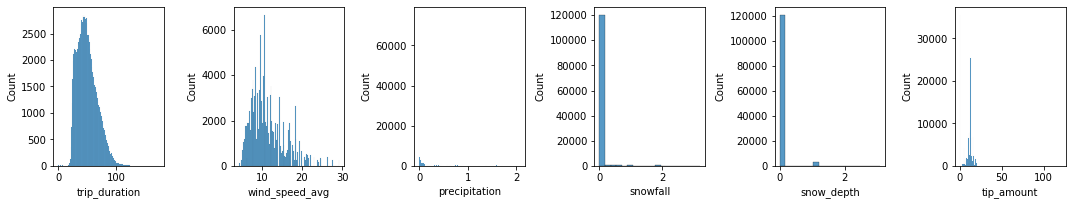

In [ ]:
continuous_attrs =  ['tip_amount', 'trip_duration', 'wind_speed_avg', 'precipitation', 'snowfall', 'snow_depth']
fig, axes = plt.subplots(ncols=int(len(continuous_attrs)))
for i, attr in enumerate(continuous_attrs):
  ax = axes[i-1]
  sns.histplot(
      data=midtown_jfk_df,
      x=attr,
      ax=ax,
  )
fig.set_size_inches(w=15, h=3)
fig.tight_layout()


Text(0.5, 0, 'Trip Duration (minutes)')

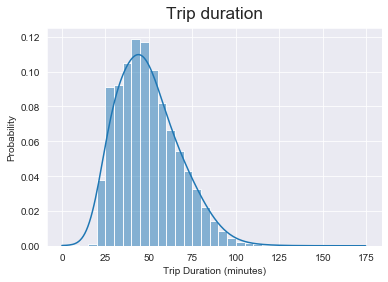

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=midtown_jfk_df.trip_duration, 
    binwidth=5,
    stat='probability',
    kde=True,
    kde_kws={
        'bw_adjust': 4
    }
)
# ax.set_xlim(left=0, right=midtown_jfk_df.trip_duration.quantile(0.9999))
ax.set_title('Trip duration', size='xx-large', pad=10,)
ax.set_xlabel('Trip Duration (minutes)')

Text(0.5, 0, 'Tip $')

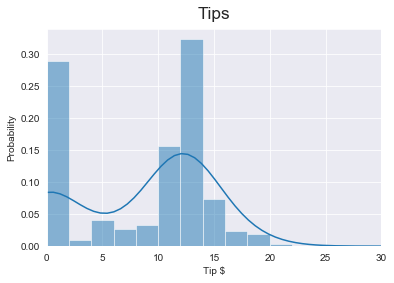

In [ ]:
fig, ax = plt.subplots()
sns.histplot(
      x=midtown_jfk_df.tip_amount + 0.00001,
      binwidth=2,
      stat='probability',
      kde=True,
      kde_kws={
          'bw_adjust': 5
      }
      # log_scale=10,
)
ax.set_title('Tips', size='xx-large', pad=10)
ax.set_xlim(left=0, right=midtown_jfk_df.tip_amount.quantile(0.999))
ax.set_xlabel('Tip $')

Text(0.5, 0, 'Passenger count')

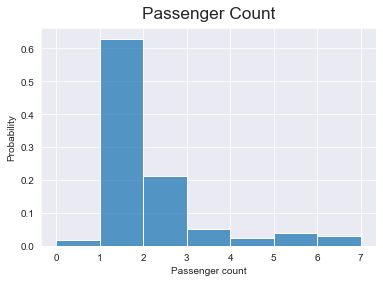

In [ ]:
fig, ax = plt.subplots()
sns.histplot(
      data=midtown_jfk_df,
      x='passenger_count',
      binwidth=1,
      stat='probability',
      # kde=True,
      # kde_kws={
      #     'bw_adjust': 1
      # }
      # log_scale=10,
)
ax.set_title('Passenger Count', size='xx-large', pad=10)
ax.set_xlabel('Passenger count')

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


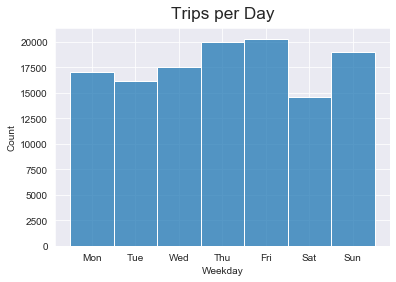

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(
    x=midtown_jfk_df.day,
    stat='count',
)
ax.set_title('Trips per Day', size='xx-large', pad=10,)
ax.set_xlabel('Weekday')
fig.show()

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


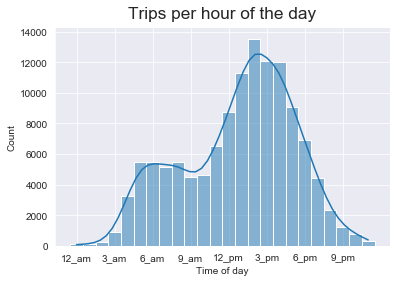

In [ ]:
fig, ax = plt.subplots()
sns.despine(fig)
ax = sns.histplot(
    x=midtown_jfk_df.hour_pickup,
    # bins='rice',
    binwidth=1,
    stat='count',
    kde=True,
    kde_kws={
        'bw_adjust': 2,
        'gridsize': 50,
        'cut': 0
    },
)
ax.set_xticks(range(0, 24, 3))
ax.set_title('Trips per hour of the day', size='xx-large', pad=10,)
ax.set_xlabel('Time of day')
fig.show()

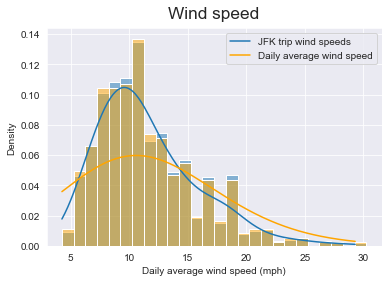

In [ ]:
with sns.axes_style('darkgrid'):
  fig, ax = plt.subplots()
  binwidth=1
  sns.histplot(
      data=midtown_jfk_df,
      x='wind_speed_avg',
      stat='density',
      binwidth=binwidth,
      kde=True,
      kde_kws={
          'bw_adjust': 4
      },
      ax=ax
  )
  sns.histplot(
      data=jfk_weather_df,
      x='wind_speed_avg',
      stat='density',
      binwidth=binwidth,
      kde=True,
      kde_kws={
          'bw_adjust': 4
      },
      color='orange',
      ax=ax
  )
  ax.set_title('Wind speed', size='xx-large', pad=10)
  ax.legend(['Daily average wind speed', 'JFK trip wind speeds'][::-1])
  ax.set_xlabel('Daily average wind speed (mph)')

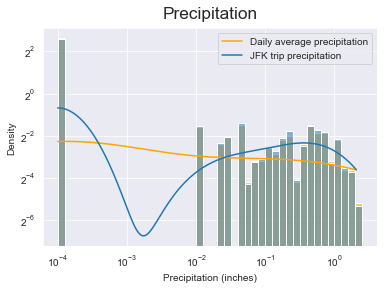

In [ ]:
with sns.axes_style('darkgrid'):
  fig, ax = plt.subplots()
  binwidth=0.1
  stat = 'density'
  smoothing = 2.5
  # bins='rice'
  log_scale = (10, 2)
  epsilon = 0.0001
  
  sns.histplot(
      x=jfk_weather_df.precipitation + epsilon,
      stat=stat,
      binwidth=binwidth,
      # bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': smoothing
      },
      color='orange',
      ax=ax,
      log_scale=log_scale
  )

  sns.histplot(
      x=midtown_jfk_df.precipitation + epsilon,
      stat=stat,
      binwidth=binwidth,
      # bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': smoothing
      },
      ax=ax,
      log_scale=log_scale,
  )
  ax.set_title('Precipitation', size='xx-large', pad=10)
  ax.legend(['Daily average precipitation', 'JFK trip precipitation'])
  ax.set_xlabel('Precipitation (inches)')

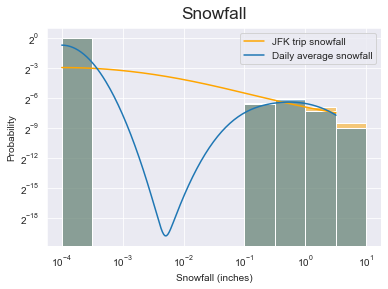

In [ ]:
with sns.axes_style('darkgrid'):
  fig, ax = plt.subplots()
  binwidth=0.5
  stat = 'probability'
  smoothing = 5
  # bins='rice'
  log_scale = (10, 2)
  epsilon = 0.0001
  sns.histplot(
      x=jfk_weather_df.snowfall + epsilon,
      stat=stat,
      binwidth=binwidth,
      # bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': 7
      },
      color='orange',
      ax=ax,
      log_scale=log_scale
  )
  sns.histplot(
      x=midtown_jfk_df.snowfall + epsilon,
      stat=stat,
      binwidth=binwidth,
      # bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': smoothing
      },
      ax=ax,
      log_scale=log_scale,
  )
  ax.set_title('Snowfall', size='xx-large', pad=10)
  ax.legend(['Daily average snowfall', 'JFK trip snowfall'][::-1])
  ax.set_xlabel('Snowfall (inches)')

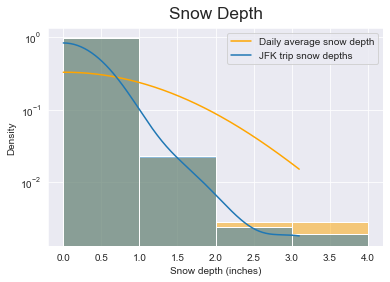

In [ ]:
with sns.axes_style('darkgrid'):
  fig, ax = plt.subplots()
  binwidth=1
  stat = 'density'
  smoothing = 5
  # bins='rice'
  log_scale = (False, 10)
  epsilon = 0.0001
  sns.histplot(
      x=jfk_weather_df.snow_depth,
      stat=stat,
      binwidth=binwidth,
      # bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': 15
      },
      color='orange',
      ax=ax,
      log_scale=log_scale
  )
  sns.histplot(
      x=midtown_jfk_df.snow_depth,
      stat=stat,
      binwidth=binwidth,
      # bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': 20
      },
      ax=ax,
      log_scale=log_scale,
  )
  
  ax.set_title('Snow Depth', size='xx-large', pad=10)
  ax.legend(['Daily average snow depth', 'JFK trip snow depths'])
  ax.set_xlabel('Snow depth (inches)')

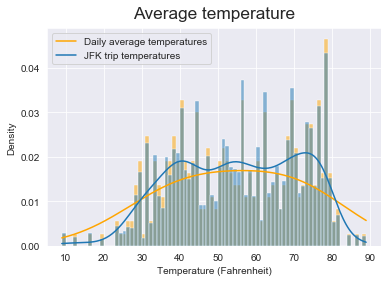

In [ ]:
with sns.axes_style('darkgrid'):
  fig, ax = plt.subplots()
  binwidth=1
  stat = 'density'
  smoothing = 2.5
  # bins='rice'
  log_scale = (False, False)
  epsilon = 0.0001
  sns.histplot(
      x=jfk_weather_df.temp_avg,
      stat=stat,
      binwidth=binwidth,
      bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': smoothing
      },
      color='orange',
      ax=ax,
      log_scale=log_scale
  )
  sns.histplot(
      x=midtown_jfk_df.temp_avg,
      stat=stat,
      binwidth=binwidth,
      bins=bins,
      kde=True,
      kde_kws={
          'bw_adjust': smoothing
      },
      ax=ax,
      log_scale=log_scale,
  )
  
  ax.set_title('Average temperature', size='xx-large', pad=10)
  ax.legend(['Daily average temperatures', 'JFK trip temperatures'])
  ax.set_xlabel('Temperature (Fahrenheit)')

### Visualisation of feature relationships

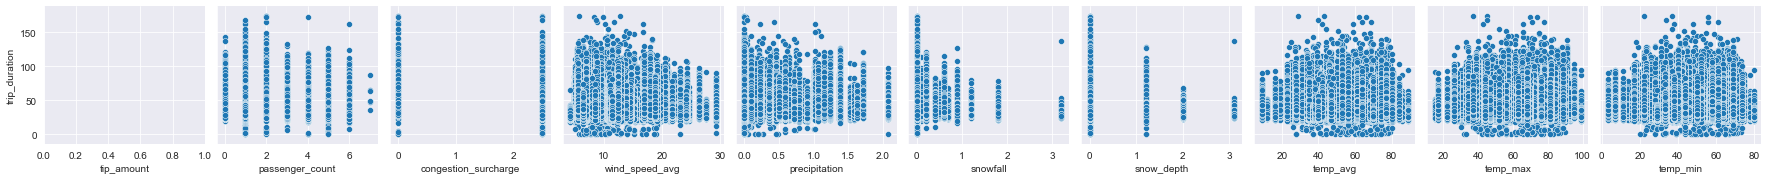

In [ ]:
grid = sns.pairplot(
    data=midtown_jfk_df,
    y_vars=['trip_duration'],
    x_vars=[
      'tip_amount',
      'passenger_count',
      'congestion_surcharge',
      'wind_speed_avg',
      'precipitation',
      'snowfall',
      'snow_depth',
      'temp_avg',
      'temp_max',
      'temp_min'
    ],
    # hue='congestion_surcharge'
)

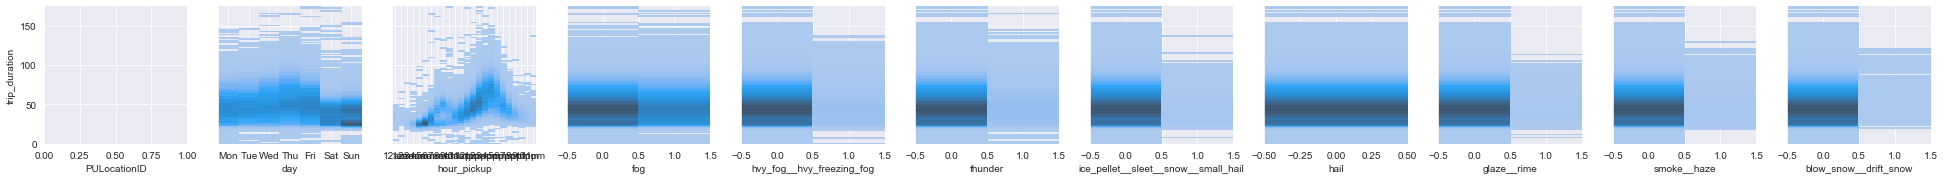

In [ ]:
grid = sns.pairplot(
    data=midtown_jfk_df,
    y_vars=['trip_duration'],
    x_vars=[
      'PULocationID',
      'day',
      'hour_pickup',
      'fog',
      'hvy_fog__hvy_freezing_fog',
      'thunder',
      'ice_pellet__sleet__snow__small_hail',
      'hail',
      'glaze__rime',
      'smoke__haze',
      'blow_snow__drift_snow',
    ],
    plot_kws={
      'discrete': (True, False)
    },
    kind='hist',
    # hue='congestion_surcharge'
)

/Users/danielye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


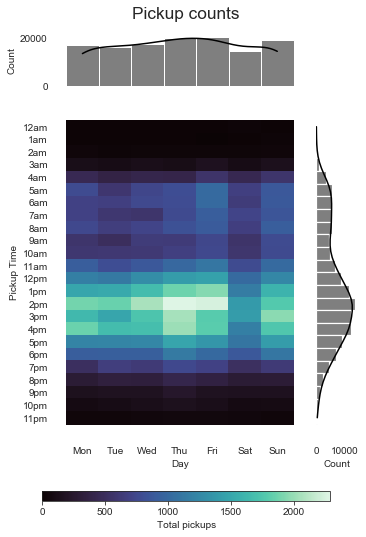

In [ ]:
with sns.axes_style('white'):

  color = 'black'
  x, y = midtown_jfk_df.day, midtown_jfk_df.hour_pickup
  grid = sns.JointGrid(
      data=midtown_jfk_df, 
      x=x, 
      y=y, 
      space=.05,
      ratio=5,
      marginal_ticks=True,
      )
  left_side = [1, 0.15, 0.02, 0.6]
  right_side = [0.1, 0, 0.8, 0.02]
  cbar_ax = grid.fig.add_axes(right_side)
  grid.plot_joint(
      sns.histplot, 
      discrete=True,
      stat='count',
      cbar=True,
      cbar_ax=cbar_ax,
      cbar_kws={
          'orientation': 'horizontal',
          'drawedges': False,
          'label': 'Total pickups'
      },
      cmap=sns.color_palette('mako', as_cmap=True),
  )
  # grid.plot_marginals(sns.histplot)
  sns.histplot(
    x=x,
    stat='count',
    ax=grid.ax_marg_x,
    color=color,
    kde=True,
    kde_kws={
        'bw_adjust': 3.5,
    }
  ) 
  sns.histplot(
    y=y,
    binwidth=1,
    stat='count',
    kde=True,
    kde_kws={
        'bw_adjust': 2,
        'gridsize': 50,
        'cut': 0
    },
    ax=grid.ax_marg_y,
    color=color
  )

  sns.despine(grid.fig, top=True, left=True, bottom=True, right=True)
  grid.set_axis_labels(ylabel='Pickup Time', xlabel='Day')
  # plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
  grid.fig.suptitle('Pickup counts', size='xx-large', va='top')
  grid.fig.tight_layout(rect=[0, 0.03, 1, 0.95])
  grid.fig.set_size_inches(w=5, h=7)
  plt.show()

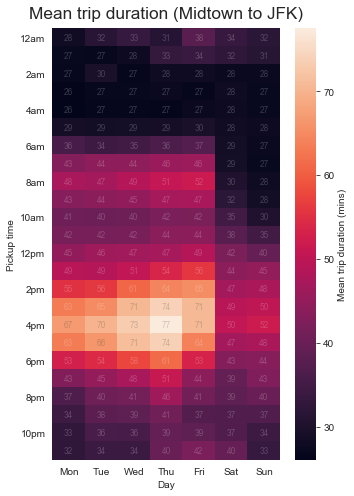

In [ ]:
duration_pivot_df = midtown_jfk_df.pivot_table(
    index='hour_pickup', 
    columns='day', 
    values='trip_duration'
)

fig, ax = plt.subplots()

with sns.axes_style('whitegrid'):
  
  sns.heatmap(
    duration_pivot_df, 
    cbar_kws={
        'orientation': 'vertical',
        'label': 'Mean trip duration (mins)'
    },
    ax=ax,
    annot=True,
    annot_kws={
        'alpha': 0.2,
        'size': 'small'
    },
  )
  ax.set_title('Mean trip duration (Midtown to JFK)', size='xx-large', pad=10)
  ax.set_xlabel('Day')
  ax.set_ylabel('Pickup time')
  fig.set_size_inches(w=5, h=7)
  fig.tight_layout()
  


Text(0.5, 1, 'Trip Distance vs. Trip Duration')

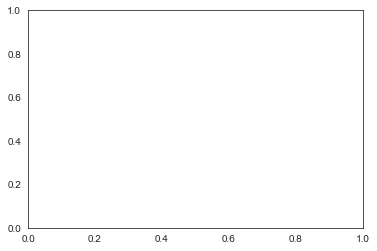

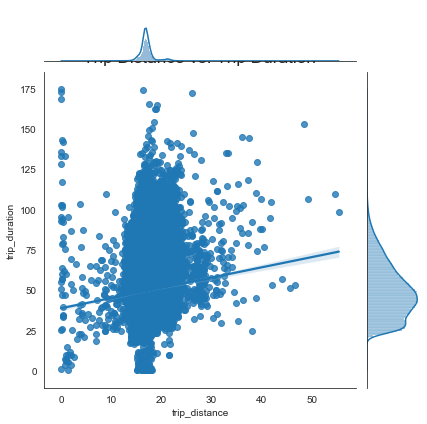

In [ ]:
fig, ax = plt.subplots()
ax = sns.jointplot(
    data=midtown_jfk_df,
    x='trip_distance',
    y='trip_duration',
    kind='reg',
)
plt.title('Trip Distance vs. Trip Duration', size='xx-large', pad=10)

Text(0.5, 1.0, 'Trip Distance vs. Trip Duration')

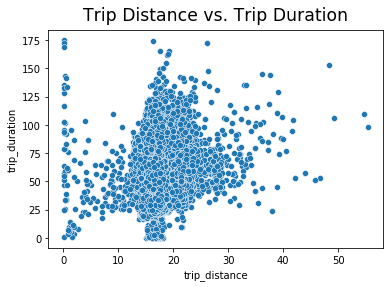

In [ ]:
fig, ax = plt.subplots()
ax = sns.scatterplot(
    x=midtown_jfk_df.trip_distance,
    y=midtown_jfk_df.trip_duration,
)
ax.set_title('Trip Distance vs. Trip Duration', size='xx-large', pad=10)

### Initial regression tree


In [ ]:
X = dummy_encoder().fit_transform(midtown_jfk_df.dropna(axis=0)).drop(columns='trip_duration')
y = midtown_jfk_df.dropna(axis=0).trip_duration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

midtown_jfk_tree_regr = tree.DecisionTreeRegressor(
    random_state=SEED,
    # max_depth=50,
    # min_impurity_decrease=0.001,
    # min_samples_leaf=5,
)
midtown_jfk_tree_regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=30034, splitter='best')

In [ ]:
midtown_jfk_tree_regr_df = pd.Series({
    'depth': midtown_jfk_tree_regr.get_depth(),
    'number_leaves' : midtown_jfk_tree_regr.get_n_leaves(),
})
midtown_jfk_tree_regr_df

depth               57
number_leaves    95962
dtype: int64

#### Evaluation

The following code adapted from Jeff Macaluso's [post](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)

In [ ]:
def calculate_residuals(model, features, label):
  """
  Creates predictions on the features wiht the model and calculates residuals)
  """
  predictions = model.predict(features)
  df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
  df_results['Residuals'] = abs(df_results.Actual) - abs(df_results.Predicted)

  return df_results

In [ ]:
def actual_v_predicted(model, features, label):
  
  print('Checking with a scatter plot of actual vs. predicted.',
          'Predictions should follow the diagonal line.')
  
  df_results = calculate_residuals(model, features, label)

  # Plotting the actual vs predicted values
  sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=5)

  # Plotting the diagonal line
  line_coords = np.arange(df_results.min().min(), df_results.max().max())
  plt.plot(line_coords, line_coords,
          color='darkorange', linestyle='--')
  plt.title('Actual vs. Predicted')
  plt.show()


Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


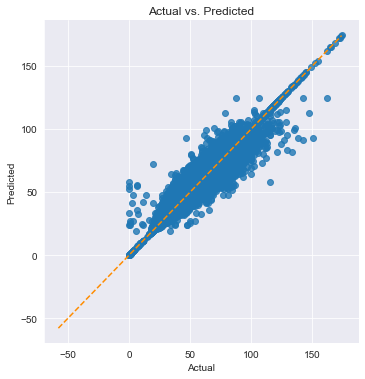

In [ ]:
actual_v_predicted(midtown_jfk_tree_regr, X_train, y_train)

In [ ]:
midtown_jfk_tree_regr.score(X_train, y_train)

0.9726035267288663

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


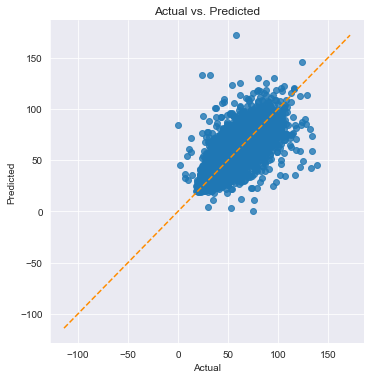

In [ ]:
actual_v_predicted(midtown_jfk_tree_regr, X_test, y_test)

In [ ]:
midtown_jfk_tree_regr.score(X_test, y_test)

0.6084573695767737

In [ ]:
score = cross_val_score(midtown_jfk_tree_regr, X, y, cv=10)

In [ ]:
score.mean()

array([-2.1084787 ,  0.04325869,  0.33484357,  0.41222733,  0.31777745,
        0.21273487,  0.26958254,  0.3482278 ,  0.31045425,  0.2342255 ])

#### Interpretation

The Gini importance: the normalised total reduction of the criterion brough by each feature.

In [ ]:
def plot_importance(tree, X):
  importances = tree.feature_importances_
  if isinstance(tree, ensemble.RandomForestRegressor):
    std = np.std(
        [tree.feature_importances_ for tree in tree.estimators_], 
        axis=0
    )
  indices = np.argsort(importances)[::-1]
  mean = np.mean(importances)
  median = np.median(importances)

  plt.figure(figsize=(13, 4))
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), 
          importances[indices],
          color='r', 
          yerr=std[indices] if isinstance(tree, ensemble.RandomForestRegressor) else 0, 
          align='center',
          capsize=0.2,
          error_kw={'elinewidth':0.5},
          )
  plt.axhline(mean, color='blue', linestyle='--')
  plt.axhline(median, color='green', linestyle='--')
  plt.xticks(
      range(X.shape[1]), 
      X.columns[indices], 
      rotation=45, 
      size='small',
      horizontalalignment='right',
  )
  plt.xlim([-1, X.shape[1]])
  plt.show()

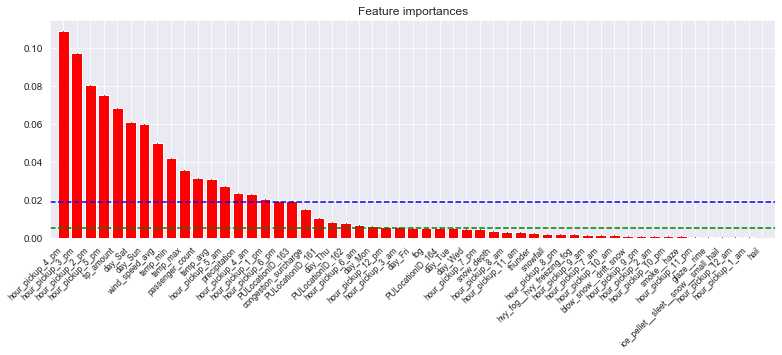

In [ ]:
plot_importance(midtown_jfk_tree_regr, X_train)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(60, 20)
fig.set_dpi(500)
fliff_flaff = tree.plot_tree(
    decision_tree=midtown_jfk_tree_regr,
    feature_names=X.columns,
    fontsize=24,
    filled=True,
    max_depth=4,
)

In [ ]:
r = tree.export_text(
    decision_tree=midtown_jfk_tree_regr,
    max_depth=5,
    feature_names=X_train.columns.values.tolist()
)
print(r)

|--- hour_pickup_4_pm <= 0.50
|   |--- hour_pickup_3_pm <= 0.50
|   |   |--- hour_pickup_5_pm <= 0.50
|   |   |   |--- hour_pickup_2_pm <= 0.50
|   |   |   |   |--- hour_pickup_5_am <= 0.50
|   |   |   |   |   |--- hour_pickup_4_am <= 0.50
|   |   |   |   |   |   |--- truncated branch of depth 52
|   |   |   |   |   |--- hour_pickup_4_am >  0.50
|   |   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |--- hour_pickup_5_am >  0.50
|   |   |   |   |   |--- PULocationID_163 <= 0.50
|   |   |   |   |   |   |--- truncated branch of depth 38
|   |   |   |   |   |--- PULocationID_163 >  0.50
|   |   |   |   |   |   |--- truncated branch of depth 27
|   |   |   |--- hour_pickup_2_pm >  0.50
|   |   |   |   |--- day_Sun <= 0.50
|   |   |   |   |   |--- day_Sat <= 0.50
|   |   |   |   |   |   |--- truncated branch of depth 38
|   |   |   |   |   |--- day_Sat >  0.50
|   |   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |   |--- day_Sun >  0.50
|   |   |   |   | 

### Model Optimisation (Feature selection and hyper-parameter tuning)

In [ ]:
%%time

tree_regr = tree.DecisionTreeRegressor()

reduced_regr = Pipeline(
    steps=[
      ('feature_selection', feature_selection.SelectFromModel(
          tree.DecisionTreeRegressor()
      )),
      ('regression', tree_regr)
    ]
)

regr = GridSearchCV(
    estimator=reduced_regr,
    param_grid={
        'feature_selection__threshold': ['0.5*mean', 'mean', '1.5*mean', ],
        # 'regression__min_impurity_decrease': [0.0, 0.0001, 0.001, 0.1],
        'regression__max_depth': [5,10,20,40,None],
        # 'regression__min_samples_leaf': [1,10,100,1000],
    },
    return_train_score=True,   
)

regr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feature_selection',
                                        SelectFromModel(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                        criterion='mse',
                                                                                        max_depth=None,
                                                                                        max_features=None,
                                                                                        max_leaf_nodes=None,
                                                                                        min_impurity_decrease=0.0,
                                                                                        min_impurity_split=None,
                                                                                        min_samples

In [ ]:
regr.best_estimator_

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                 criterion='mse',
                                                                 max_depth=None,
                                                                 max_features=None,
                                                                 max_leaf_nodes=None,
                                                                 min_impurity_decrease=0.0,
                                                                 min_impurity_split=None,
                                                                 min_samples_leaf=1,
                                                                 min_samples_split=2,
                                                                 min_weight_fraction_leaf=0.0,
                                                                 presort='depre

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


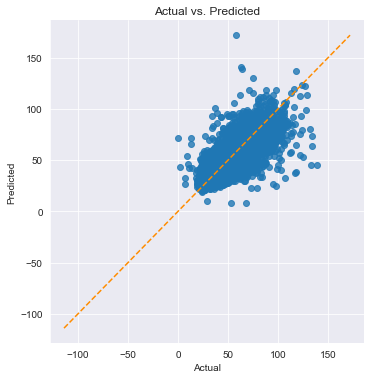

0.6463448822404615


In [ ]:
actual_v_predicted(regr, X_test, y_test)
score1 = regr.score(X_test, y_test)
print(score1)

In [ ]:
tree_regr2 = tree.DecisionTreeRegressor()

gkf = GroupKFold(n_splits=5)

tree_regr2 = GridSearchCV(
    estimator=tree.DecisionTreeRegressor(),
    param_grid={'min_impurity_decrease' : [0.1, 0.01, 0.001]},
    cv=5,
)
tree_regr2.fit(X_train, y_train)

lower_dim_regr = Pipeline(
    steps=[
        ('feature_selection', feature_selection.SelectFromModel(
            estimator=tree_regr2.best_estimator_,
            # prefit=True
            )
        ),
        ('tree_hyperparam_search', tree.DecisionTreeRegressor())
    ]
)

regr2 = GridSearchCV(
    estimator=lower_dim_regr,
    param_grid={
        'feature_selection__threshold': ['0.5*mean', 'mean', '1.5*mean', ],
        'tree_hyperparam_search__max_depth': [5,10,20,40,None],
    },
    
)

regr2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feature_selection',
                                        SelectFromModel(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                        criterion='mse',
                                                                                        max_depth=None,
                                                                                        max_features=None,
                                                                                        max_leaf_nodes=None,
                                                                                        min_impurity_decrease=0.01,
                                                                                        min_impurity_split=None,
                                                                                        min_sample

In [ ]:
tree_regr3 = tree.DecisionTreeRegressor()

gkf = GroupKFold(n_splits=5)

tree_regr3 = GridSearchCV(
    estimator=tree.DecisionTreeRegressor(),
    param_grid={'max_depth': [5,10,20,40,None]},
    cv=5,
)
tree_regr3.fit(X_train, y_train)

lower_dim_regr3 = Pipeline(
    steps=[
        ('feature_selection', feature_selection.SelectFromModel(
            estimator=tree_regr3.best_estimator_,
            # prefit=True
            )
        ),
        ('tree_hyperparam_search', tree.DecisionTreeRegressor())
    ]
)

regr3 = GridSearchCV(
    estimator=lower_dim_regr3,
    param_grid={
        'feature_selection__threshold': ['0.5*mean', 'mean', '1.5*mean', ],
        'tree_hyperparam_search__max_depth': [5,10,20,40,None],
    },
    
)

regr3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feature_selection',
                                        SelectFromModel(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                        criterion='mse',
                                                                                        max_depth=20,
                                                                                        max_features=None,
                                                                                        max_leaf_nodes=None,
                                                                                        min_impurity_decrease=0.0,
                                                                                        min_impurity_split=None,
                                                                                        min_samples_l

In [ ]:
regr3.best_score_

0.6545860493844466

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


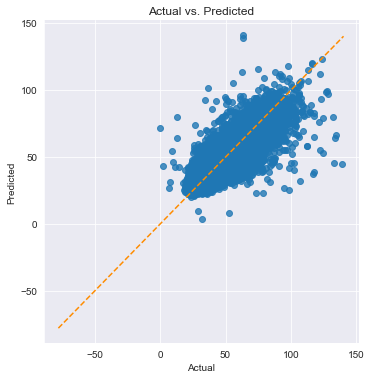

0.6682055463974161

In [ ]:
actual_v_predicted(regr3, X_test, y_test)
regr3.score(X_test, y_test)

In [ ]:
best_feature_selector = regr3.best_estimator_['feature_selection']
best_feature_selector_tree = best_feature_selector.estimator_
plot_importance(best_feature_selector_tree, X_train)


In [ ]:
best_estimator = regr3.best_estimator_['tree_hyperparam_search']
feature_support = best_feature_selector.get_support()
selected_features = X_train.columns[feature_support].to_list()
r = tree.export_text(
    decision_tree=best_estimator,
    # max_depth=20,
    feature_names=selected_features
)
print(r)

|--- hour_pickup_4_pm <= 0.50
|   |--- hour_pickup_3_pm <= 0.50
|   |   |--- hour_pickup_5_pm <= 0.50
|   |   |   |--- hour_pickup_2_pm <= 0.50
|   |   |   |   |--- hour_pickup_5_am <= 0.50
|   |   |   |   |   |--- hour_pickup_4_am <= 0.50
|   |   |   |   |   |   |--- day_Sun <= 0.50
|   |   |   |   |   |   |   |--- day_Sat <= 0.50
|   |   |   |   |   |   |   |   |--- hour_pickup_6_pm <= 0.50
|   |   |   |   |   |   |   |   |   |--- hour_pickup_1_pm <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- PULocationID_163 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- PULocationID_163 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- hour_pickup_1_pm >  0.50
|   |   |   |   |   |   |   |   |   |   |--- PULocationID_163 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


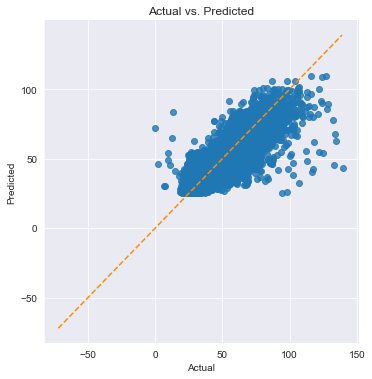

KeyboardInterrupt: ignored

In [ ]:
actual_v_predicted(pruned_regr, X_test, y_test)
pruned_regr.score(X_test, y_test)
cross_val_score(
    estimator=pruned_regr,
    X=X_train,
    y=y_train,
    cv=5,
)
cross_val_score(
    estimator=pruned_regr,
    X=X_test,
    y=y_test,
    cv=5,
)

In [ ]:
cross_val_score(regr, X, y, cv=10)

In [ ]:
regr.named_steps['hyperparam_tune']

## Random Forest

In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.1)
midtown_jfk_forest_regr = ensemble.RandomForestRegressor(
    n_estimators=20,
)
midtown_jfk_forest_regr.fit(X_train, y_train)

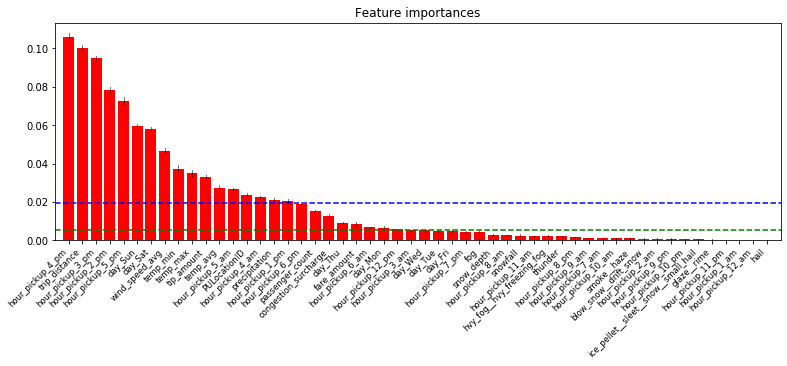

In [ ]:
importances = midtown_jfk_forest_regr.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in midtown_jfk_forest_regr.estimators_], 
    axis=0
)
indices = np.argsort(importances)[::-1]
mean = np.mean(importances)
median = np.median(importances)

plt.figure(figsize=(13, 4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), 
        importances[indices],
        color='r', 
        yerr=std[indices], 
        align='center',
        capsize=0.2,
        error_kw={'elinewidth':0.5},
        )
plt.axhline(mean, color='blue', linestyle='--')
plt.axhline(median, color='green', linestyle='--')
plt.xticks(
    range(X.shape[1]), 
    X.columns[indices], 
    rotation=45, 
    size='small',
    horizontalalignment='right',
)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
selector = feature_selection.SelectFromModel(
    estimator=midtown_jfk_forest_regr,
    prefit=True,
)
selected = selector.transform(X_train)
selected

array([[0.0, 16.56, 163, ..., 0, 0, 0],
       [0.0, 17.8, 164, ..., 0, 0, 0],
       [0.0, 18.1, 163, ..., 1, 0, 0],
       ...,
       [16.59, 17.87, 162, ..., 0, 0, 0],
       [11.1, 17.35, 161, ..., 1, 0, 0],
       [0.0, 16.6, 162, ..., 0, 1, 0]], dtype=object)

# Wastes


In [ ]:
midtown_jfk_duration_model = LinearRegression()
midtown_jfk_duration_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
midtown_jfk_duration_model.score(X, y)

0.020122911962943135

### Fit Ridge Regression Model

In [ ]:
RidgeCV

### Fit LASSO Regression Model

In [ ]:
lasso_model = LassoLarsCV(cv=5)
lasso_model.fit(X, y)
lasso_model.score(X, y)

0.0076875635132729325

### Testing linear model assumptions
The following code copied from Jeff Macaluso's [post](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)

#### Linearity

In [ ]:
def calculate_residuals(model, features, label):
  """
  Creates predictions on the features wiht the model and calculates residuals)
  """
  predictions = model.predict(features)
  df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
  df_results['Residuals'] = abs(df_results.Actual) - abs(df_results.Predicted)

  return df_results

In [ ]:
def linear_assumption(model, features, label):
  """
  Linearity: Assums that there is a linear relationship between the predictiors 
      and the response variable. If not, either a quadratic term or another
      algorithm should be used.
  """

  print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
  print('Checking with a scatter plot of actual vs. predicted.',
          'Predictions should follow the diagonal line.')
  
  # Calculating residuals for the plot
  df_results = calculate_residuals(model, features, label)

  # Plotting the actual vs predicted values
  sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)

  # Plotting the diagonal line
  line_coords = np.arange(df_results.min().min(), df_results.max().max())
  plt.plot(line_coords, line_coords,
          color='darkorange', linestyle='--')
  plt.title('Actual vs. Predicted')
  plt.show()
  


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


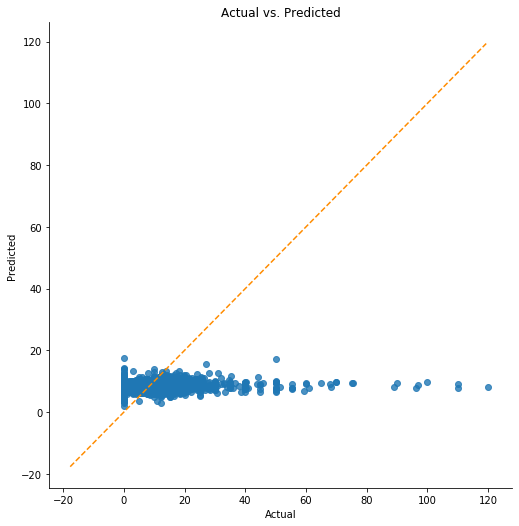

In [ ]:
linear_assumption(midtown_jfk_duration_model, X, y)

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/danielye/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


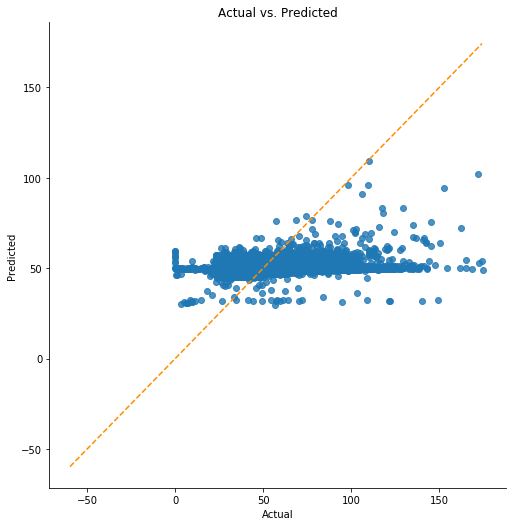

In [ ]:
linear_assumption(lasso_model, X, y)

In [ ]:
tlc_df.trip_duration.describe()

count    118551.000000
mean         49.824249
std          17.355900
min           0.000000
25%          36.700000
50%          47.583333
75%          60.633333
max         174.616667
Name: trip_duration, dtype: float64

#### Normality of the error terms

In [ ]:
linear_fit = ols(
    formula='trip_duration ~' + ' + '.join(X.columns.values), 
    data=tlc_df
).fit()

TypeError: ignored

In [ ]:
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     276.3
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:08:12   Log-Likelihood:                -34439.
No. Observations:                8950   AIC:                         6.893e+04
Df Residuals:                    8922   BIC:                         6.913e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -10.4676      2.545     -4.113      0.000     -15.456      -5.479
fog[T.True]                                    -1.9247      0.634     -3.036      0.002      -3.168      -0.682
hvy_fog__hvy_freezing_fog[T.True]               1.6546      0.730      2.265      0.024       0.223       3.086
thunder[T.True]                             -1.363e-13   2.47e-14     -5.517      0.000   -1.85e-13   -8.78e-14
ice_pellet__sleet__snow__small_hail[T.True]     4.9248      1.365      3.607      0.000       2.248       7.601
hail[T.True]                                -2.621e-16   3.19e-15     -0.082      0.934   -6.51e-15    5.99e-15
glaze__rime[T.True]                             2.4460      0.774      3.159      0.002       0.928       3.964
smoke__haze[T.True]                            -2.6707      0.885     -3.017      0.003      -4.406      -0.935
blow_snow__drift_snow[T.True]               -7.806e-15   3.52e-15     -2.217      0.027   -1.47e-14   -9.03e-16
fare_amount                                     0.4493      0.067      6.697      0.000       0.318       0.581
tip_amount                                      0.0221      0.021      1.075      0.282      -0.018       0.062
passenger_count                                 0.0487      0.094      0.518      0.605      -0.136       0.233
trip_distance                                   0.5837      0.087      6.738      0.000       0.414       0.754
congestion_surcharge                           -1.3250      0.322     -4.121      0.000      -1.955      -0.695
hour_pickup                                     1.7342      0.028     62.597      0.000       1.680       1.789
wind_speed_avg                                  0.1612      0.045      3.596      0.000       0.073       0.249
precipitation                                  -4.3540      1.258     -3.462      0.001      -6.819      -1.889
snowfall                                       -3.9224      0.657     -5.972      0.000      -5.210      -2.635
snow_depth                                     -3.8498      0.615     -6.256      0.000      -5.056      -2.643
temp_avg                                       -0.8157      0.114     -7.181      0.000      -1.038      -0.593
temp_max                                        0.4341      0.055      7.944      0.000       0.327       0.541
temp_min                                        0.5889      0.078      7.576      0.000       0.437       0.741
day_Mon                                        -2.1032      0.629     -3.343      0.001      -3.336      -0.870
day_Tue                                        -2.6327      0.578     -4.554      0.000      -3.766      -1.499
day_Wed                                         7.7387     

### LASSO Regression